# German Housing Prices vs Interest Rate (1990–2025)

#### Goal: Explore how Interest rate trends relate to housing price changes in Germany (GREIX dataset)

### Load Data

In [12]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the long-term interest rate data
interest = pd.read_csv("Data/Long term interest rate-Germany.csv")

# GREIX housing prices (yearly average)
greix = pd.read_excel("Data/GREIX_all_cities_data.xlsx")

# Display first few rows
interest.head()


,DATE,TIME PERIOD,"Long-term interest rate for convergence purposes - 10 years maturity, denominated in Euro - Germany (IRS.M.DE.L.L40.CI.0000.EUR.N.Z)"
0,1990-01-31,1990Jan,7.63
1,1990-02-28,1990Feb,8.43
2,1990-03-31,1990Mar,8.67
3,1990-04-30,1990Apr,8.70
4,1990-05-31,1990May,8.74


### Cleaning and Preprocessing

In [13]:
# Rename columns for clarity
interest = interest.rename(columns={
    "Long-term interest rate for convergence purposes - 10 years maturity, denominated in Euro - Germany (IRS.M.DE.L.L40.CI.0000.EUR.N.Z)": "Interest_Rate"
})

# Convert date and extract year
interest["DATE"] = pd.to_datetime(interest["DATE"], errors="coerce")
interest["Year"] = interest["DATE"].dt.year

# Compute yearly average interest rate
interest_yearly = interest.groupby("Year", as_index=False)["Interest_Rate"].mean()

print("Yearly interest rate data loaded successfully.")
print(interest_yearly.head())

Yearly interest rate data loaded successfully.
   Year  Interest_Rate
0  1990       8.704167
1  1991       8.458333
2  1992       7.847500
3  1993       6.510833
4  1994       6.866667


### Focus only on the national average (GREIX)

In [18]:
# Keep only national data
greix_national = greix[greix["City"] == "GREIX"].copy()

# Group by year and calculate average price
yearly_prices = greix_national.groupby("Year", as_index=False)["Price"].mean()
yearly_prices.rename(columns={"Price": "Average_Price (€)"}, inplace=True)

print("GREIX yearly housing price data:")
display(yearly_prices.head())


GREIX yearly housing price data:


,Year,Average_Price (€)
0,1965,650.000000
1,1966,666.666667
2,1967,716.666667
3,1968,733.333333
4,1969,750.000000


### Merge Datasets

In [19]:
# Filter GREIX data from 1990 onwards (to match interest rate data)
yearly_prices = yearly_prices[yearly_prices["Year"] >= 1990].reset_index(drop=True)

# Merge datasets on Year
merged_interest = pd.merge(yearly_prices, interest_yearly, on="Year", how="inner")

print("Merged dataset preview:")
display(merged_interest.head())

print("Shape of merged dataset:", merged_interest.shape)


Merged dataset preview:


,Year,Average_Price (€),Interest_Rate
0,1990,1363.333333,8.704167
1,1991,1483.333333,8.458333
2,1992,1596.666667,7.847500
3,1993,1640.000000,6.510833
4,1994,1666.666667,6.866667


Shape of merged dataset: (36, 3)


### Housing prices vs Interest rates

Exploring how borrowing costs shape long-term changes in property values

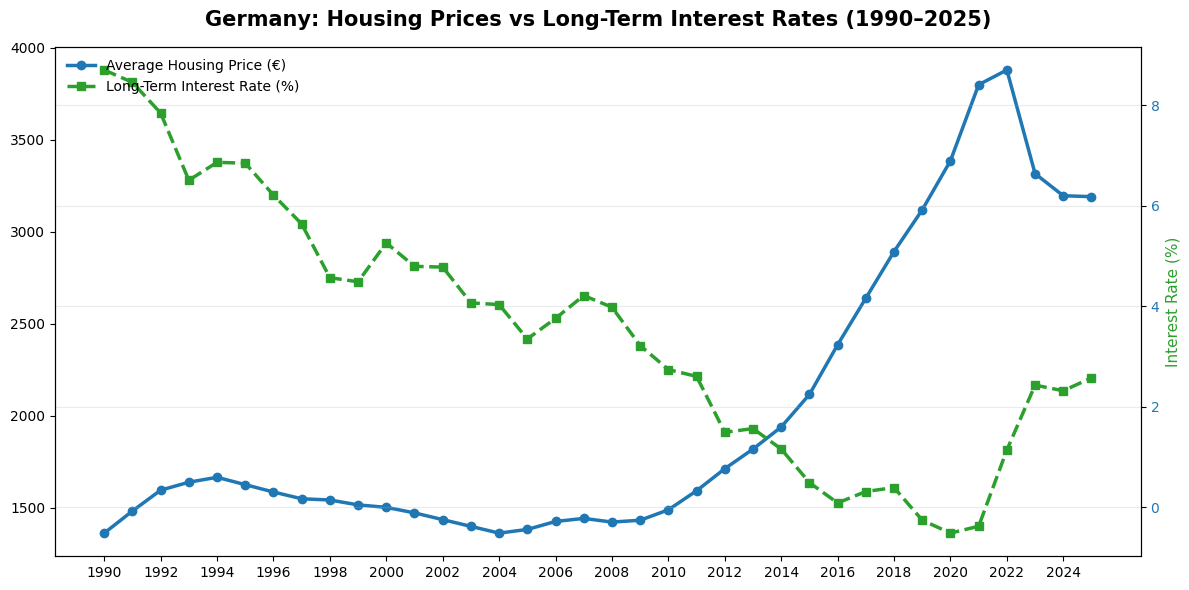

In [27]:
plt.figure(figsize=(12,6))

# Plot housing prices (left axis)
line1, = plt.plot(
    merged_interest["Year"],
    merged_interest["Average_Price (€)"],
    color="#1f77b4", marker="o", linewidth=2.5,
    label="Average Housing Price (€)"
)

# Plot interest rate (right axis)
ax2 = plt.twinx()
line2, = ax2.plot(
    merged_interest["Year"],
    merged_interest["Interest_Rate"],
    color="#2ca02c", linestyle="--", marker="s", linewidth=2.5,
    label="Long-Term Interest Rate (%)"
)

# Title
plt.title("Germany: Housing Prices vs Long-Term Interest Rates (1990–2025)",
          fontsize=15, fontweight="bold", pad=15)

# Axis labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Housing Price (€)", color="#1f77b4", fontsize=11)
ax2.set_ylabel("Interest Rate (%)", color="#2ca02c", fontsize=11)

# Customize ticks and grid
plt.grid(alpha=0.25)
plt.xticks(
    merged_interest["Year"][::2],  # every 2 years
    rotation=45,
    fontsize=10
)
plt.yticks(fontsize=10)
ax2.tick_params(axis="y", labelcolor="#2ca02c")
plt.tick_params(axis="y", labelcolor="#1f77b4")

# Unified legend (blue + green)
plt.legend(
    handles=[line1, line2],
    labels=["Average Housing Price (€)", "Long-Term Interest Rate (%)"],
    loc="upper left",
    fontsize=10,
    frameon=False
)

# Layout
plt.tight_layout()
plt.show()


The plot shows a clear inverse relationship between long-term interest rates and housing prices in Germany. From 1990 to the mid-2010s, interest rates steadily declined from above 8% to nearly 0% while housing prices gradually rose. This pattern reflects how lower borrowing costs made mortgages cheaper, encouraging more home purchases and pushing property values upward.

After 2021, a noticeable shift occurred. As interest rates began rising again due to inflationary pressures and monetary tightening, housing prices started to lose momentum.

### Correlation and simple summary stats

In [34]:
# Compute correlation coefficient
corr_value = merged_interest["Average_Price (€)"].corr(merged_interest["Interest_Rate"])

# Compute summary statistics
summary_stats = merged_interest[["Average_Price (€)", "Interest_Rate"]].describe()

print(f"Correlation between housing prices and interest rates: {corr_value:.2f}\n")
print("Summary statistics:")
display(summary_stats)


Correlation between housing prices and interest rates: -0.67

Summary statistics:


,Average_Price (€),Interest_Rate
count,36.000000,36.000000
mean,2009.583333,3.496381
std,788.457342,2.581917
min,1363.333333,-0.510000
25%,1465.833333,1.412083
50%,1595.000000,3.557917
75%,2450.000000,4.913958
max,3880.000000,8.704167


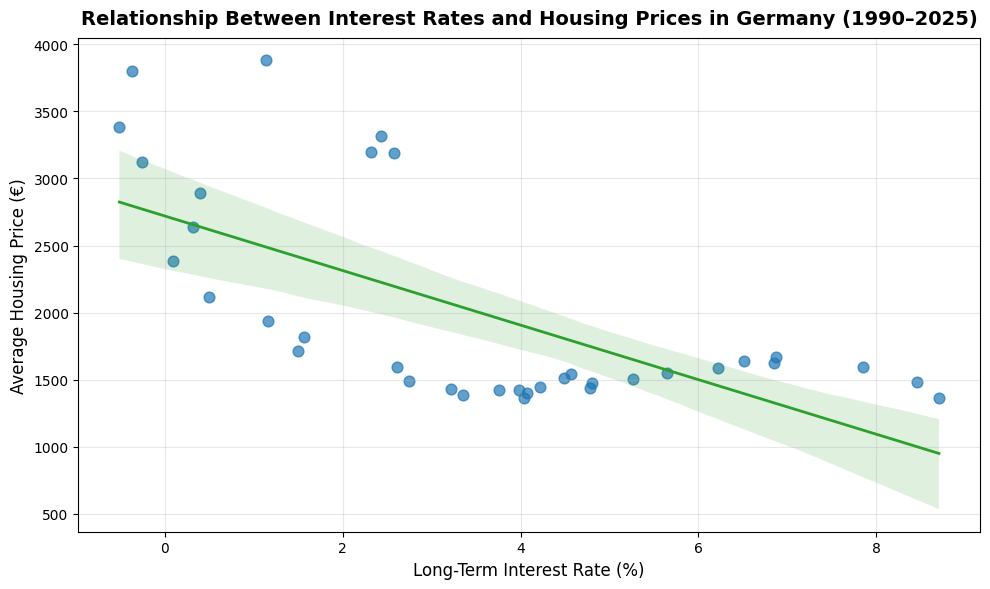

In [33]:
plt.figure(figsize=(10,6))

sns.regplot(
    data=merged_interest,
    x="Interest_Rate",
    y="Average_Price (€)",
    scatter_kws={"s":60, "alpha":0.7, "color":"#1f77b4"},
    line_kws={"color":"#2ca02c", "lw":2}
)

plt.title("Relationship Between Interest Rates and Housing Prices in Germany (1990–2025)",
          fontsize=14, fontweight="bold", pad=10)
plt.xlabel("Long-Term Interest Rate (%)", fontsize=12)
plt.ylabel("Average Housing Price (€)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The plot clearly shows a negative relationship between long-term interest rates and housing prices in Germany. As interest rates declined over the years, borrowing money became cheaper — and that’s when housing prices began to climb. The chart shows this inverse pattern clearly: whenever rates dropped, buyers rushed in, pushing prices higher. It’s a simple story of how cheaper loans made homes more affordable to buy, but more expensive to own.